# Analysis of Markov transition probabilities for lattice atomic defects

Paper can be found at https://arxiv.org/abs/1803.05381

### Authors: Artem Maksov, Maxim Ziatdinov*

*_Correspondence to: ziatdinovmax@gmail.com_

_Date: 05/13/2018_    

In this notebook, we demonstrate how to use an information on occurence of several defect states along the multiple isolated trajectories can be used to construct Markov (transition) matrix.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
flow = np.load('flow.npy')

We can interpret traces as lists containing class label at every timestep that label is defined on

In [3]:
fl_cl = dict()

for i in flow.item():
    fl_cl[i] = list()
    for it in flow.item()[i]:
        clustnums = [1, 2, 3, 4]
        for cl in clustnums:
            if len(flow.item()[i][it][cl]) > 0:
                fl_cl[i].append(cl)

We relabel the classes to prepare for inferring transition probabilities:

In [4]:
for trace in fl_cl:
    fl_cl[trace] = [a-1 for a in fl_cl[trace]]

We define a function to get probabilities from observations

In [5]:
def transition_matrix(trace):
    n = 1+ max(trace) #number of states

    #M = [[0]*n for _ in range(n)]
    M = np.zeros(shape=(n, n))
    
    for (i,j) in zip(trace,trace[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    for row in M:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return M

We calculate probabilities for all recorded traces and calculate mean

In [6]:
m = np.zeros(shape = (len(fl_cl), 4, 4))

In [7]:
for i in fl_cl:
    m[i] = transition_matrix(fl_cl[i])

In [8]:
mtot = np.mean(m, axis=0)

In [9]:
print(mtot)

[[ 0.10813397  0.31901914  0.265311    0.30753589]
 [ 0.12245688  0.18133569  0.35623065  0.33997678]
 [ 0.18299351  0.23385332  0.26509152  0.31806165]
 [ 0.16767163  0.20472051  0.28236597  0.3452419 ]]


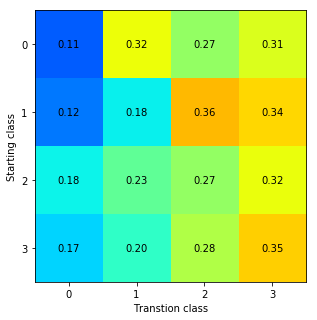

In [10]:
fig450 = plt.figure(450, figsize=(5, 5))
ax = fig450.add_subplot(111)
imsh = ax.imshow(mtot, cmap='jet', vmin = 0., vmax = 0.5)
ax.set_xticks([0, 1, 2, 3])
ax.set_yticks([0, 1, 2, 3])
ax.set_xlabel('Transtion class')
ax.set_ylabel('Starting class')

for (j,i),label in np.ndenumerate(mtot):
    ax.text(i,j, "%.2f" % label,ha='center',va='center')
    
#fig450.savefig(directory + 'trans_prob' + '.png')